In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks
import os

In [2]:
if os.path.getsize('/Users/utkucicek/Desktop/bme 261/106m.pkl')> 0 :
    with open('/Users/utkucicek/Desktop/bme 261/106m.pkl', 'rb') as file:
        loaded = pickle.load(file)
# print(loaded)


In [3]:
fs = 360
T = 5
time = np.linspace(0, T, fs * T)
signal = loaded[:fs * T]
signal = np.array(signal)
signal = signal / 200
print(time.shape)
signal.shape


(1800,)


(1800,)

In [6]:
from cgi import test
import pytest 

%%pytest
def test_signal_shape():
    assert signal.shape == (1800,)


UsageError: Line magic function `%%pytest` not found.


Text(0, 0.5, 'signal (mV)')

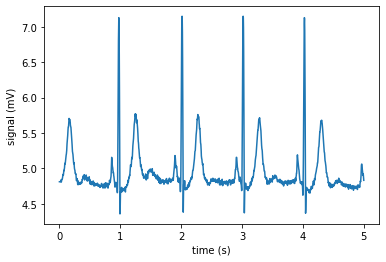

In [4]:
plt.plot(time,signal)
plt.xlabel('time (s)')
plt.ylabel('signal (mV)')

(array([  57,  309,  351,  448,  683,  725,  818, 1046, 1086, 1183, 1407,
       1448, 1550, 1787]), {'peak_heights': array([5.705, 5.155, 7.13 , 5.77 , 5.18 , 7.15 , 5.76 , 5.155, 7.15 ,
       5.715, 5.19 , 7.13 , 5.68 , 5.06 ])})
[0.15842135 0.85881045 0.97554197 1.24513619 1.89827682 2.01500834
 2.27348527 2.90717065 3.01834352 3.28793774 3.91050584 4.02445803
 4.30794886 4.96664814]


Text(0, 0.5, 'signal (mV)')

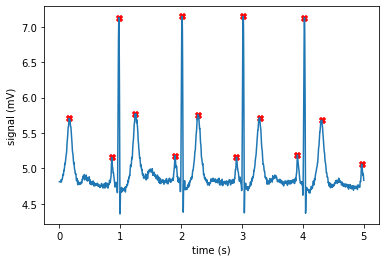

In [5]:
peaks=find_peaks(signal, height=5, distance=40)# height 4.85
print(peaks)
len(peaks[0])
height = peaks[1]['peak_heights']
peak_pos =time[peaks[0]]
print(peak_pos)
plt.scatter(peak_pos,height,marker='X',color='red')
plt.plot(time,signal)
plt.xlabel('time (s)')
plt.ylabel('signal (mV)')

In [6]:
def t_waves(signals):
   peaks=find_peaks(signals, height=[5.5,6.5], distance=40)
   height = peaks[1]['peak_heights']
   peak_pos =time[peaks[0]]
   return peak_pos,height

Text(0, 0.5, 'signal (mV)')

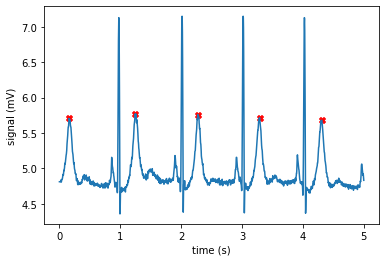

In [7]:
peak_pos,height = t_waves(signal) # function is working for 0-5s
plt.scatter(peak_pos,height,marker='X',color='red')
plt.plot(time,signal)
plt.xlabel('time (s)')
plt.ylabel('signal (mV)')

Text(0, 0.5, 'signal (mV)')

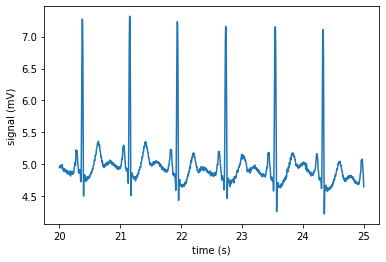

In [8]:
T= 5
T25= 25
fs=360
time = np.linspace(20,T25, fs * T)
signal = loaded[20 *fs : fs * T25]
signal = np.array(signal)
signal = signal / 200
plt.plot(time,signal)
plt.xlabel('time (s)')
plt.ylabel('signal (mV)')

In [33]:
def robust_t_waves(signals):
   peaks=find_peaks(signals, height=[5.0,6.5], distance=120)
   height = peaks[1]['peak_heights']
   peak_pos =time[peaks[0]]
   return peak_pos,height

In [11]:
peaks=find_peaks(signal, height=5, distance=40)# height 4.85
print(peaks)
len(peaks[0])
height = peaks[1]['peak_heights']
peak_pos =time[peaks[0]]

(array([  92,  136,  230,  297,  369,  415,  507,  572,  656,  697,  794,
        940,  983, 1077, 1233, 1275, 1382, 1444, 1558, 1658, 1790]), {'peak_heights': array([5.03 , 7.275, 5.36 , 5.065, 5.09 , 7.32 , 5.35 , 5.055, 5.23 ,
       7.235, 5.175, 5.195, 7.16 , 5.155, 5.175, 7.155, 5.175, 5.03 ,
       7.11 , 5.045, 5.08 ])})


In [35]:
peak_pos, height = robust_t_waves(signal)
print(peak_pos)


[20.27515286 20.63924402 21.0561423  21.40911618 21.82323513 22.20678155
 22.62645914 22.99332963 23.44080044 23.84102279 24.23012785 24.60811562
 24.9749861 ]


In [40]:
pp,ph=[],[]
for i,(p,h) in enumerate(zip(peak_pos,height)):
    if i % 2 == 0:
        pp.append(p)
        ph.append(h)

In [ ]:
import pytest



Text(0, 0.5, 'signal (mV)')

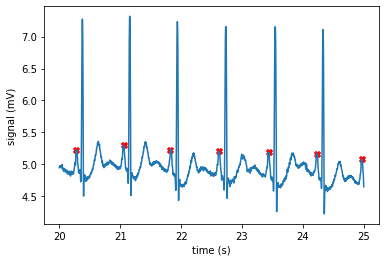

In [41]:
plt.scatter(pp,ph,marker='X',color='red')
plt.plot(time,signal)
plt.xlabel('time (s)')
plt.ylabel('signal (mV)')